In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold

In [2]:
df=pd.read_excel("/content/With missing Values.xlsx")

In [3]:
df

,Name,HTN,DM,SMK,DL,FH,AMI,Sex,NSTEMI,SA,UA,HOCABG,HOPCI,Age_Group,LDL1,HDL1,TG1,EF1,Indication1,TC1
0,Dr. khorshed Jahan M,1,1,0,0,0,0,1,0,1,0,1,1,2,2.0,2.0,2.0,2.0,5,1.0
1,Zahir Uddin Shapon,1,0,0,0,0,0,2,1,0,0,0,1,2,1.0,2.0,1.0,2.0,5,1.0
2,S M Saiful Islam,1,1,1,0,1,0,2,1,0,0,0,0,2,2.0,2.0,2.0,1.0,3,1.0
3,Rowshan Ara Begum,0,1,0,0,0,1,1,0,0,0,0,0,3,1.0,2.0,2.0,2.0,1,1.0
4,Monsur Ahmed,0,0,1,0,0,0,2,0,1,0,0,0,2,1.0,2.0,2.0,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,AB Kuddus,1,1,1,0,0,0,2,0,0,1,0,0,2,2.0,1.0,2.0,1.0,4,3.0
1497,Sanjoy Kumar Ghosh,0,0,1,0,0,0,2,0,1,0,0,0,1,2.0,2.0,2.0,1.0,2,2.0
1498,Harun Ur Rashid,0,0,1,0,0,0,2,0,0,1,0,0,2,1.0,2.0,1.0,1.0,4,1.0
1499,Taposh Day,1,0,0,0,1,0,2,1,0,0,0,0,1,1.0,2.0,2.0,1.0,3,1.0


In [4]:
df.drop('Name',axis=1,inplace=True)

# Data COllection

# b) Data Understanding

In [5]:
#i)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HTN          1501 non-null   int64  
 1   DM           1501 non-null   int64  
 2   SMK          1501 non-null   int64  
 3   DL           1501 non-null   int64  
 4   FH           1501 non-null   int64  
 5   AMI          1501 non-null   int64  
 6   Sex          1501 non-null   int64  
 7   NSTEMI       1501 non-null   int64  
 8   SA           1501 non-null   int64  
 9   UA           1501 non-null   int64  
 10  HOCABG       1501 non-null   int64  
 11  HOPCI        1501 non-null   int64  
 12  Age_Group    1501 non-null   int64  
 13  LDL1         1434 non-null   float64
 14  HDL1         1434 non-null   float64
 15  TG1          1434 non-null   float64
 16  EF1          1405 non-null   float64
 17  Indication1  1501 non-null   int64  
 18  TC1          1434 non-null   float64
dtypes: flo

In [6]:
df[['LDL1', 'HDL1', 'TG1', 'EF1', 'TC1']] = df[['LDL1', 'HDL1', 'TG1', 'EF1', 'TC1']].apply(pd.to_numeric, errors='coerce').fillna(0).astype('int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   HTN          1501 non-null   int64
 1   DM           1501 non-null   int64
 2   SMK          1501 non-null   int64
 3   DL           1501 non-null   int64
 4   FH           1501 non-null   int64
 5   AMI          1501 non-null   int64
 6   Sex          1501 non-null   int64
 7   NSTEMI       1501 non-null   int64
 8   SA           1501 non-null   int64
 9   UA           1501 non-null   int64
 10  HOCABG       1501 non-null   int64
 11  HOPCI        1501 non-null   int64
 12  Age_Group    1501 non-null   int64
 13  LDL1         1501 non-null   int64
 14  HDL1         1501 non-null   int64
 15  TG1          1501 non-null   int64
 16  EF1          1501 non-null   int64
 17  Indication1  1501 non-null   int64
 18  TC1          1501 non-null   int64
dtypes: int64(19)
memory usage: 222.9 KB


In [8]:
df.describe()

,HTN,DM,SMK,DL,FH,AMI,Sex,NSTEMI,SA,UA,HOCABG,HOPCI,Age_Group,LDL1,HDL1,TG1,EF1,Indication1,TC1
count,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000
mean,0.669554,0.475017,0.404397,0.009993,0.381746,0.373751,1.885410,0.165889,0.249167,0.171219,0.034644,0.103931,1.711526,1.383078,1.703531,1.461026,1.262492,2.645570,1.268488
std,0.470531,0.499542,0.490939,0.099499,0.485977,0.483960,0.318633,0.372105,0.432675,0.376826,0.182936,0.305272,0.569263,0.570807,0.545937,0.581360,0.567203,1.513372,0.683520
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,5.000000,3.000000


In [9]:
# ii) Feature Names and Counts = 18 Dep and 1 indep features
df.columns

Index(['HTN', 'DM', 'SMK', 'DL', 'FH', 'AMI', 'Sex', 'NSTEMI', 'SA', 'UA',
       'HOCABG', 'HOPCI', 'Age_Group', 'LDL1', 'HDL1', 'TG1', 'EF1',
       'Indication1', 'TC1'],
      dtype='object')

# iii) Handel the Missing Values and Outliers  

Use Mice algorithms

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [11]:
df_imputer = df.copy(deep= True)

In [12]:
iterimp = IterativeImputer()
df_imputer.iloc[:,:] = iterimp.fit_transform(df_imputer)

In [13]:
df_imputer.isna().sum()

HTN            0
DM             0
SMK            0
DL             0
FH             0
AMI            0
Sex            0
NSTEMI         0
SA             0
UA             0
HOCABG         0
HOPCI          0
Age_Group      0
LDL1           0
HDL1           0
TG1            0
EF1            0
Indication1    0
TC1            0
dtype: int64

In [14]:
df=df_imputer

In [15]:
df.isnull().sum()

HTN            0
DM             0
SMK            0
DL             0
FH             0
AMI            0
Sex            0
NSTEMI         0
SA             0
UA             0
HOCABG         0
HOPCI          0
Age_Group      0
LDL1           0
HDL1           0
TG1            0
EF1            0
Indication1    0
TC1            0
dtype: int64

print(df['LDL1'].mode())
print(df['HDL1'].mode())
print(df['TG1'].mode())
print(df['EF1'].mode())
print(df['TC1'].mode())

THE LINE IS COMMENT

df['column_name']=df['column_name'].replace([v1, v2, v3], [a, b, c])
df['column_name']=df['column_name'].replace([v1, v2, v3], [a, b, c])
df[['LDL1', 'HDL1', 'TG1', 'EF1', 'TC1']]

df['LDL1']=df['LDL1'].replace([0],[1])
df['HDL1']=df['HDL1'].replace([0],[2])
df['TG1']=df['TG1'].replace([0],[2])
df['EF1']=df['EF1'].replace([0],[1])
df['TC1']=df['TC1'].replace([0],[1])

In [16]:
df.isnull().sum()

HTN            0
DM             0
SMK            0
DL             0
FH             0
AMI            0
Sex            0
NSTEMI         0
SA             0
UA             0
HOCABG         0
HOPCI          0
Age_Group      0
LDL1           0
HDL1           0
TG1            0
EF1            0
Indication1    0
TC1            0
dtype: int64

# iv) Check the duplicates

Drop the Object Columns (Name Column Delted)

In [17]:
df.duplicated().sum()

388

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 0 to 1500
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   HTN          1113 non-null   int64
 1   DM           1113 non-null   int64
 2   SMK          1113 non-null   int64
 3   DL           1113 non-null   int64
 4   FH           1113 non-null   int64
 5   AMI          1113 non-null   int64
 6   Sex          1113 non-null   int64
 7   NSTEMI       1113 non-null   int64
 8   SA           1113 non-null   int64
 9   UA           1113 non-null   int64
 10  HOCABG       1113 non-null   int64
 11  HOPCI        1113 non-null   int64
 12  Age_Group    1113 non-null   int64
 13  LDL1         1113 non-null   int64
 14  HDL1         1113 non-null   int64
 15  TG1          1113 non-null   int64
 16  EF1          1113 non-null   int64
 17  Indication1  1113 non-null   int64
 18  TC1          1113 non-null   int64
dtypes: int64(19)
memory usage: 173.9 KB


In [20]:
# v) SHow the imbalanced Dataset using Graph
df['AMI'].value_counts()

0    712
1    401
Name: AMI, dtype: int64

In [21]:
699-396
#imbanalced Dataset Half dataset is Missing after removing the sublicated ,

303

# 4)  Feature Selection using orginal data (without Null and duplicate)

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features and target
X_Feature_Selection = df.drop('AMI', axis=1)
y_Feature_Selection = df['AMI']

# Split data into training and testing sets
X_train_Feature_Selection, X_test_Feature_Selection, y_train_Feature_Selection, y_test_Feature_Selection = train_test_split(X_Feature_Selection, y_Feature_Selection, test_size=0.2, random_state=42)

In [23]:
print(X_train_Feature_Selection.shape)
print(X_test_Feature_Selection.shape)
print(y_train_Feature_Selection.shape)
print(y_test_Feature_Selection.shape)

(890, 18)
(223, 18)
(890,)
(223,)


# i)Checking Multicolinearity using orginal data (without Null and duplicate)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

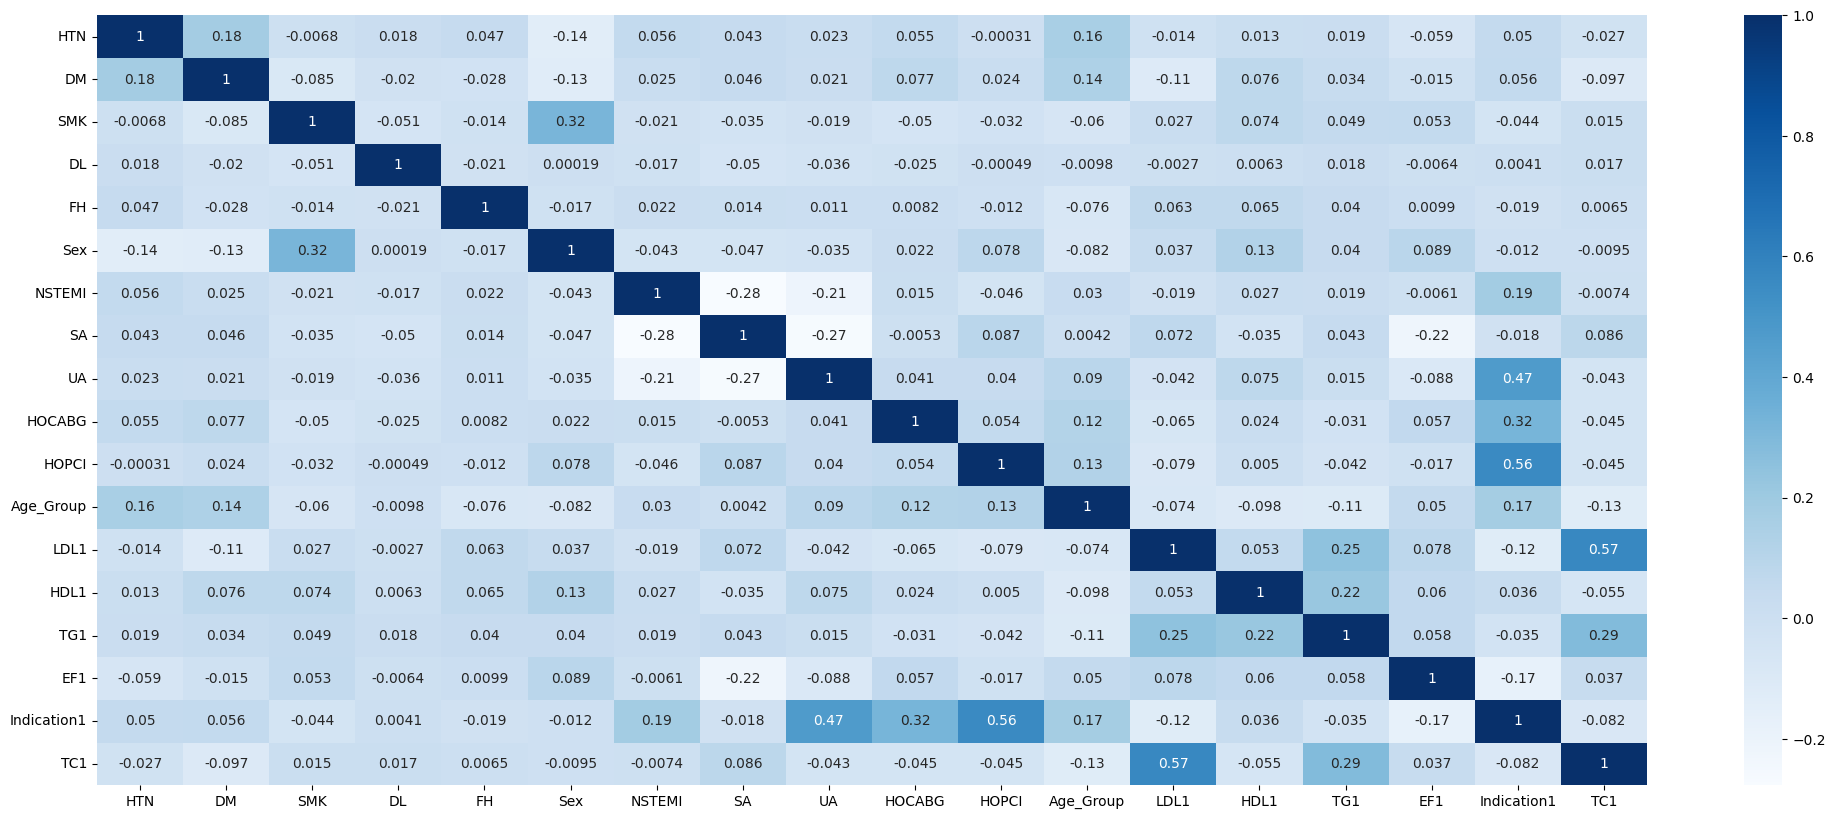

In [24]:
#Multicolinearity Test
plt.figure(figsize=(25,10))
sns.heatmap(X_Feature_Selection.corr(),cmap="Blues", annot=True)
sns.color_palette("Paired")

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_Feature_Selection.shape[1]):
    vif.append(variance_inflation_factor(X_Feature_Selection, i))

In [26]:
pd.DataFrame({'vif': vif}, index=X_Feature_Selection.columns[0:18]).T

,HTN,DM,SMK,DL,FH,Sex,NSTEMI,SA,UA,HOCABG,HOPCI,Age_Group,LDL1,HDL1,TG1,EF1,Indication1,TC1
vif,3.114958,2.101563,1.904186,1.037892,1.753135,22.363127,2.166236,2.013817,2.920924,1.317444,2.209942,9.207568,13.329729,13.822049,10.72172,7.360443,14.246439,7.610038


In [27]:
X_train_Feature_Selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 450 to 1115
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   HTN          890 non-null    int64
 1   DM           890 non-null    int64
 2   SMK          890 non-null    int64
 3   DL           890 non-null    int64
 4   FH           890 non-null    int64
 5   Sex          890 non-null    int64
 6   NSTEMI       890 non-null    int64
 7   SA           890 non-null    int64
 8   UA           890 non-null    int64
 9   HOCABG       890 non-null    int64
 10  HOPCI        890 non-null    int64
 11  Age_Group    890 non-null    int64
 12  LDL1         890 non-null    int64
 13  HDL1         890 non-null    int64
 14  TG1          890 non-null    int64
 15  EF1          890 non-null    int64
 16  Indication1  890 non-null    int64
 17  TC1          890 non-null    int64
dtypes: int64(18)
memory usage: 132.1 KB


In [28]:
# VIF SCORES
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(X_train_Feature_Selection.shape[1]):
    vif.append(variance_inflation_factor(X_train_Feature_Selection, i))

In [29]:
pd.DataFrame({'vif': vif}, index=X_train_Feature_Selection.columns[0:18]).T

,HTN,DM,SMK,DL,FH,Sex,NSTEMI,SA,UA,HOCABG,HOPCI,Age_Group,LDL1,HDL1,TG1,EF1,Indication1,TC1
vif,3.185535,2.082549,1.935619,1.048344,1.754259,22.282034,2.246843,1.936174,2.955895,1.281058,2.169099,9.286418,13.616683,14.118229,10.902999,7.444486,14.091573,7.840518


# ii) Lasso technique for feature selection using orginal data (without Null and duplicate)

In [30]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=10,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X_Feature_Selection,y_Feature_Selection)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


In [31]:
names=df.drop("AMI", axis=1).columns
print("Column Names: {}".format(names.values))

Column Names: ['HTN' 'DM' 'SMK' 'DL' 'FH' 'Sex' 'NSTEMI' 'SA' 'UA' 'HOCABG' 'HOPCI'
 'Age_Group' 'LDL1' 'HDL1' 'TG1' 'EF1' 'Indication1' 'TC1']


In [32]:
# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params , cv=kf)
lasso_cv.fit(X_Feature_Selection,y_Feature_Selection)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


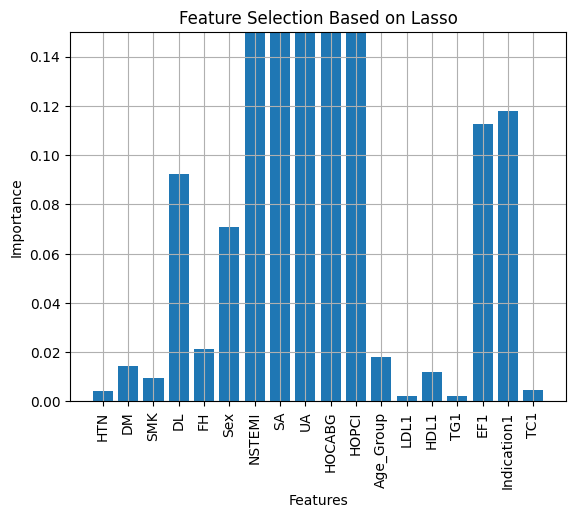

In [33]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train_Feature_Selection, y_train_Feature_Selection)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0,0.15)
plt.show()

In [34]:
107+23+16+129

275

In [35]:
98+19+25+133

275

# Feature Engineering

# PCA

In [ ]:
X_train_Feature_Selection, X_test_Feature_Selection, y_train_Feature_Selection, y_test_Feature_Selection = train_test_split(X_Feature_Selection, y_Feature_Selection, test_size=0.2, random_state=42)

In [ ]:
df.head()

,HTN,DM,SMK,DL,FH,AMI,Sex,NSTEMI,SA,UA,HOCABG,HOPCI,Age_Group,LDL1,HDL1,TG1,EF1,Indication1,TC1
0,1,1,0,0,0,0,1,0,1,0,1,1,2,2,2,2,2,5,1
1,1,0,0,0,0,0,2,1,0,0,0,1,2,1,2,1,2,5,1
2,1,1,1,0,1,0,2,1,0,0,0,0,2,2,2,2,1,3,1
3,0,1,0,0,0,1,1,0,0,0,0,0,3,1,2,2,2,1,1
4,0,0,1,0,0,0,2,0,1,0,0,0,2,1,2,2,1,2,1


In [ ]:
X = df.drop('AMI',axis=1)
y = df['AMI']

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca.fit(X)
x_pca=pca.transform(X)
x_pca

array([[ 2.29878612, -0.24182134],
       [ 2.35603635,  0.47798302],
       [ 0.27677524, -0.0688948 ],
       ...,
       [ 1.21000306, -1.64703878],
       [-0.92131368, -1.07377501],
       [-1.77698528,  0.27180826]])

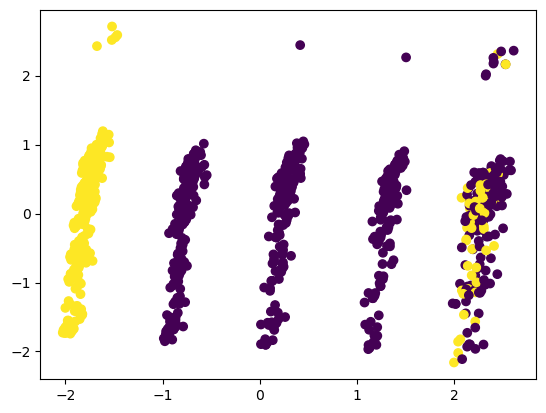

In [ ]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y.values)

In [ ]:
x_pca=pd.DataFrame(x_pca)

,0,1
0,2.298786,-0.241727
1,2.356037,0.477939
2,0.276776,-0.068975
3,-1.638753,0.819338
4,-0.731220,0.361283
...,...,...
1108,1.241660,-0.261690
1109,-1.829779,-1.473136
1110,1.210003,-1.647009
1111,-0.921314,-1.073769


C:\Users\USER\AppData\Local\Temp\ipykernel_27688\2481950381.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_pca[col])


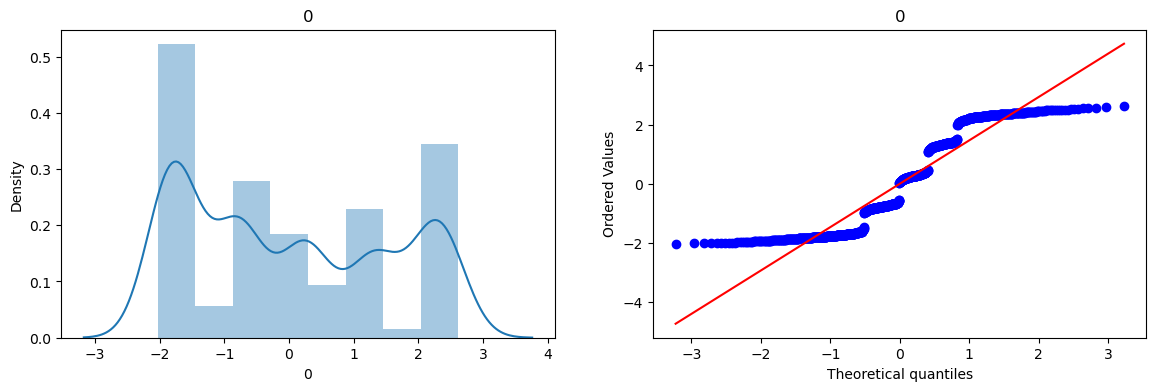

C:\Users\USER\AppData\Local\Temp\ipykernel_27688\2481950381.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_pca[col])


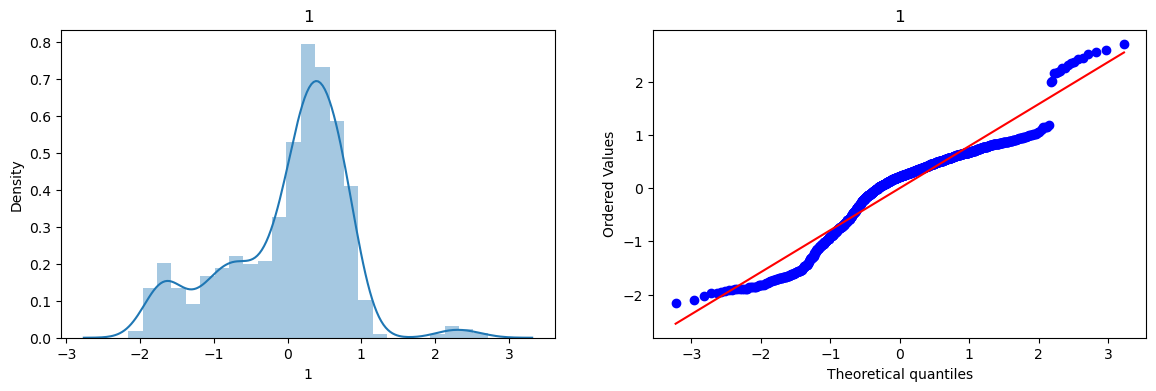

In [ ]:
# Plotting the distplots without any transformation
import scipy.stats as stats

for col in x_pca.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_pca[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_pca[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [ ]:
 X_train_Feature_Selection, X_test_Feature_Selection, y_train_Feature_Selection, y_test_Feature_Selection = train_test_split(x_pca, y_Feature_Selection, test_size=0.2, random_state=42)

In [ ]:
y_pred3.shape

(223,)

In [ ]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train_Feature_Selection)
X_test_transformed2 = pt1.transform(X_test_Feature_Selection)

lr = LogisticRegression()
lr.fit(X_train_transformed2,y_train_Feature_Selection)

y_pred3 = lr.predict(X_test_Feature_Selection)

print(r2_score(y_test_Feature_Selection,y_pred3))

pd.DataFrame({'cols':X_train_Feature_Selection.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})


-0.4083792919409359


,cols,Yeo_Johnson_lambdas
0,0,0.797308
1,1,1.338165


In [ ]:
# applying cross val score
from sklearn.model_selection import cross_val_score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LogisticRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='accuracy'))

0.9532622308407062

In [ ]:
X_train_transformed2=pd.DataFrame(X_train_transformed2)
X_test_transformed2=pd.DataFrame(X_test_transformed2)

In [ ]:
x_yeo=X_train_transformed2
x_yeo.append(X_test_transformed2)

C:\Users\USER\AppData\Local\Temp\ipykernel_27688\2730979543.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_yeo.append(X_test_transformed2)


,0,1
0,-0.370038,0.972918
1,-0.418494,0.856947
2,1.353524,-0.051636
3,1.382678,-0.152884
4,-1.154275,1.158649
...,...,...
218,-1.260127,-0.779523
219,-1.180355,0.590055
220,0.913937,0.869092
221,-1.197019,0.327660


C:\Users\USER\AppData\Local\Temp\ipykernel_27688\3169824892.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_pca[col])


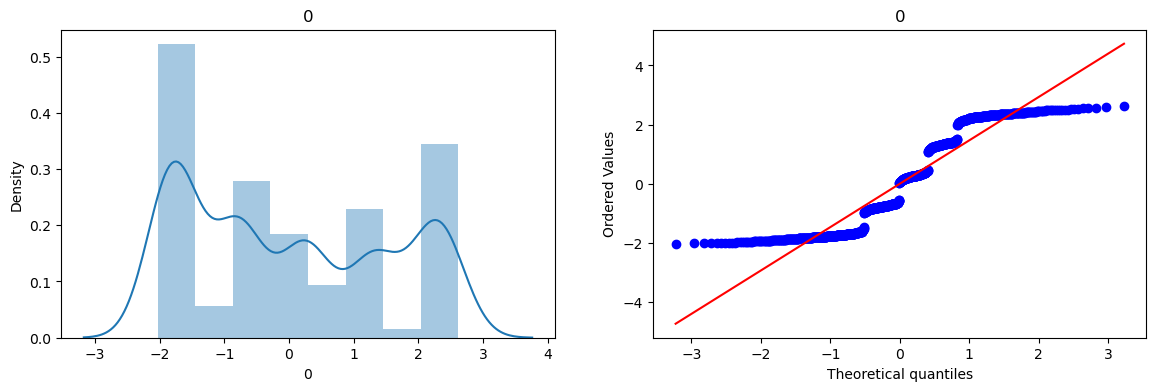

C:\Users\USER\AppData\Local\Temp\ipykernel_27688\3169824892.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_pca[col])


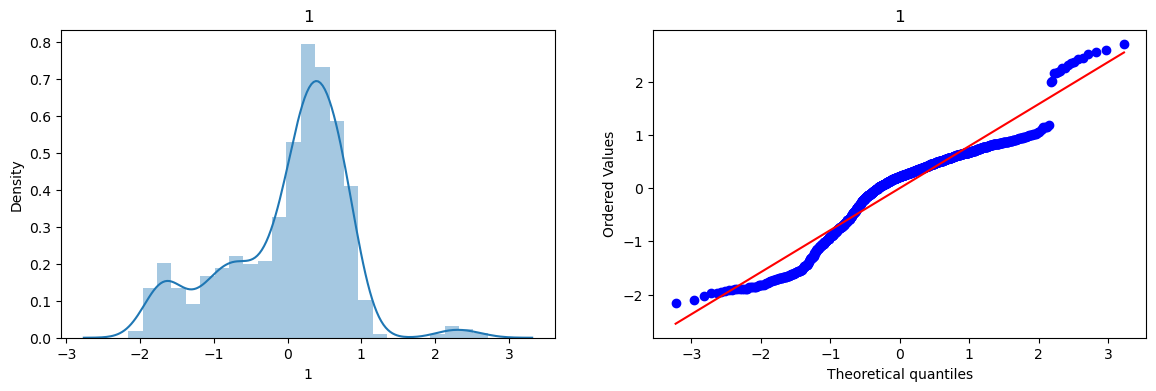

In [ ]:
# Plotting the distplots without any transformation
import scipy.stats as stats

for col in x_yeo.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_pca[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_pca[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

# Assumptions of Linear Regression

In [ ]:
df

,HTN,DM,SMK,DL,FH,AMI,Sex,NSTEMI,SA,UA,HOCABG,HOPCI,Age_Group,LDL1,HDL1,TG1,EF1,Indication1,TC1
0,1,1,0,0,0,0,1,0,1,0,1,1,2,2,2,2,2,5,1
1,1,0,0,0,0,0,2,1,0,0,0,1,2,1,2,1,2,5,1
2,1,1,1,0,1,0,2,1,0,0,0,0,2,2,2,2,1,3,1
3,0,1,0,0,0,1,1,0,0,0,0,0,3,1,2,2,2,1,1
4,0,0,1,0,0,0,2,0,1,0,0,0,2,1,2,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,1,0,1,0,0,0,2,0,0,1,0,0,2,2,2,2,2,4,1
1495,1,0,0,0,1,1,1,0,0,0,0,0,2,2,2,2,1,1,3
1496,1,1,1,0,0,0,2,0,0,1,0,0,2,2,1,2,1,4,3
1497,0,0,1,0,0,0,2,0,1,0,0,0,1,2,2,2,1,2,2


In [ ]:
a=X_train_transformed2[0]
b=X_train_transformed2[1]

In [ ]:
a

0     -0.370038
1     -0.418494
2      1.353524
3      1.382678
4     -1.154275
         ...   
885   -0.295894
886   -0.552711
887   -1.202031
888   -1.334484
889    1.388534
Name: 0, Length: 890, dtype: float64

In [ ]:
X = df.drop('AMI',axis=1)
X.isnull().sum()

HTN            0
DM             0
SMK            0
DL             0
FH             0
Sex            0
NSTEMI         0
SA             0
UA             0
HOCABG         0
HOPCI          0
Age_Group      0
LDL1           0
HDL1           0
TG1            0
EF1            0
Indication1    0
TC1            0
dtype: int64

# Oversampling ( Training dataset not the Whole dataset)

In [36]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [37]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df.drop('AMI',axis=1)
y = df['AMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
# vi) DATA balanced in Smote technique
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train_oversampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_oversampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_oversampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_oversampled == 0)))

After OverSampling, the shape of train_X: (1012, 18)
After OverSampling, the shape of train_y: (1012,) 

After OverSampling, counts of label '1': 506
After OverSampling, counts of label '0': 506


In [39]:
y_train_oversampled=pd.DataFrame(y_train_oversampled)
y_test=pd.DataFrame(y_test)

In [40]:
y_oversampled_dataframe=pd.concat([y_train_oversampled,y_test],axis=0)

In [41]:
y_oversampled_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 116
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AMI     1346 non-null   int64
dtypes: int64(1)
memory usage: 21.0 KB


In [42]:
x_train_oversampled=pd.DataFrame(x_train_oversampled)
x_test=pd.DataFrame(X_test)

In [43]:
x_oversampled_dataframe=pd.concat([x_train_oversampled,x_test],axis=0)

In [44]:
# Making New DataFrame with oversampled Data
df_oversampled=pd.concat([x_oversampled_dataframe, y_oversampled_dataframe],axis=1)

In [45]:
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 116
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   HTN          1346 non-null   int64
 1   DM           1346 non-null   int64
 2   SMK          1346 non-null   int64
 3   DL           1346 non-null   int64
 4   FH           1346 non-null   int64
 5   Sex          1346 non-null   int64
 6   NSTEMI       1346 non-null   int64
 7   SA           1346 non-null   int64
 8   UA           1346 non-null   int64
 9   HOCABG       1346 non-null   int64
 10  HOPCI        1346 non-null   int64
 11  Age_Group    1346 non-null   int64
 12  LDL1         1346 non-null   int64
 13  HDL1         1346 non-null   int64
 14  TG1          1346 non-null   int64
 15  EF1          1346 non-null   int64
 16  Indication1  1346 non-null   int64
 17  TC1          1346 non-null   int64
 18  AMI          1346 non-null   int64
dtypes: int64(19)
memory usage: 210.3 KB


In [46]:
df.to_excel('dataset_excel_file_for_R.xlsx', index=False)

In [47]:
# SIZE OF TEST AND TRAINING DATASET
print(y_test.value_counts())
print(y_train_oversampled.value_counts())

AMI
0      206
1      128
dtype: int64
AMI
0      506
1      506
dtype: int64


In [48]:
print('training_data',506+506)
print('test_data',206+128)

training_data 1012
test_data 334


In [49]:
total_data=(1012+334)
print('total_data',total_data)

total_data 1346


Data amount : 1346

 MinMaxScaller in Oversampled Dataset

'''s_scaler =MinMaxScaler()
df_MinMaxScaller = s_scaler.fit_transform(df_oversampled)
df_MinMaxScaller = pd.DataFrame(df_MinMaxScaller, columns=df_oversampled.columns)'''

df_MinMaxScaller.head(20)

5) Model insialization (  not using the scaler

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
x_MinMaxScaller = df_MinMaxScaller.drop('AMI',axis=1)
y_MinMaxScaller = df_MinMaxScaller['AMI']
x_train_MinMaxScaller, x_test_MinMaxScaller, y_train_MinMaxScaller, y_test_MinMaxScaller = train_test_split(x_MinMaxScaller, y_MinMaxScaller, test_size=0.3, random_state=0)

In [50]:
# Can use K Flod

# 2)	Classification Algorithms and Classification parameters.

In [51]:
# 1)Used Algorithm
# ii) Used Parameters
#iii) Accuracy scores

# Result Part

In [52]:
# After Doing all things the shape of the data and columns Also the Target variables

# Using Oversampling data the analysis part is happened

# Divide the over Sampled Data

In [53]:
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 116
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   HTN          1346 non-null   int64
 1   DM           1346 non-null   int64
 2   SMK          1346 non-null   int64
 3   DL           1346 non-null   int64
 4   FH           1346 non-null   int64
 5   Sex          1346 non-null   int64
 6   NSTEMI       1346 non-null   int64
 7   SA           1346 non-null   int64
 8   UA           1346 non-null   int64
 9   HOCABG       1346 non-null   int64
 10  HOPCI        1346 non-null   int64
 11  Age_Group    1346 non-null   int64
 12  LDL1         1346 non-null   int64
 13  HDL1         1346 non-null   int64
 14  TG1          1346 non-null   int64
 15  EF1          1346 non-null   int64
 16  Indication1  1346 non-null   int64
 17  TC1          1346 non-null   int64
 18  AMI          1346 non-null   int64
dtypes: int64(19)
memory usage: 210.3 KB


# Accuracy Matrix

In [54]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'matthews_corrcoef',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'positive_likelihood_ratio',
 'neg_negative_likelihood_ratio',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',

# KNN

In [57]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,x_oversampled_dataframe, y_oversampled_dataframe['AMI'],cv=10,scoring='f1')
print(scores.mean())

0.9483905868973851


In [56]:
from sklearn.neighbors import KNeighborsClassifier
kNN_MODEL = KNeighborsClassifier(n_neighbors=5)
# Fit Model
kNN_MODEL.fit(x_train_oversampled, y_train_oversampled)
# Predict the test set results
y_pred_knn = kNN_MODEL.predict(x_test)
print('Model accuracy :',accuracy_score(y_test['AMI'],y_pred_knn))
# Look at classification report to evaluate the model
print(classification_report(y_test['AMI'], y_pred_knn))

Model accuracy : 0.9251497005988024
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       206
           1       0.87      0.95      0.91       128

    accuracy                           0.93       334
   macro avg       0.92      0.93      0.92       334
weighted avg       0.93      0.93      0.93       334



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [58]:
#Cohen Kappa Score's
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test['AMI'],y_pred_knn)

0.8446511627906976

In [59]:
import numpy as np
from scipy import stats

knn.fit(x_train_oversampled, y_train_oversampled)

z_value = stats.norm.ppf(1 - 0.05 / 2)
acc_test = knn.score(x_test, y_test['AMI'])
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

print(ci_lower, ci_upper)

0.896928360347977 0.9533710408496279


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# CART MODEL

In [60]:
# Fit the model
cart_model = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, class_weight=None, min_samples_leaf=100, random_state=0)
clf = cart_model.fit(x_train_oversampled, y_train_oversampled)
# Predict class labels on a test data
pred_y1_cart = cart_model.predict(x_test)
score_CART= accuracy_score(y_test['AMI'], pred_y1_cart)
print("Normal accuracy: ",score_CART)
# Look at classification report to evaluate the model
print(classification_report(y_test['AMI'], pred_y1_cart))
print(pd.crosstab(y_test['AMI'], pred_y1_cart))
print('--------------------------------------------------------')
print("")

Normal accuracy:  0.8892215568862275
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       206
           1       0.82      0.91      0.86       128

    accuracy                           0.89       334
   macro avg       0.88      0.89      0.88       334
weighted avg       0.89      0.89      0.89       334

col_0    0    1
AMI            
0      181   25
1       12  116
--------------------------------------------------------



In [61]:
#Cohen Kappa Score's
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test['AMI'],pred_y1_cart)

0.7700837209302325

In [62]:
import numpy as np
from scipy import stats

cart_model.fit(x_train_oversampled, y_train_oversampled)

z_value = stats.norm.ppf(1 - 0.05 / 2)
acc_test = cart_model.score(x_test, y_test['AMI'])
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

print(ci_lower, ci_upper)

0.855562071061796 0.922881042710659


In [63]:
#Indetify the Value of N
#for i in range(1,21):
scores_Carrt=cross_val_score(cart_model,x_oversampled_dataframe, y_oversampled_dataframe['AMI'],cv=10,scoring='f1')
print(scores_Carrt.mean())

0.8995367778116126


# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
Rm_model = RandomForestClassifier(criterion='gini',
                              min_samples_leaf=200
                              )
# Fit the model
clf = Rm_model.fit(x_train_oversampled, y_train_oversampled)
# Predict class labels on a test data
y_pred_rm = Rm_model.predict(x_test)
print('*************** Evaluation on Test Data ***************')
score_te_rm = accuracy_score(y_test['AMI'], y_pred_rm)
print('Accuracy Score: ', score_te_rm)
# Look at classification report to evaluate the model
print(classification_report(y_test['AMI'], y_pred_rm))

*************** Evaluation on Test Data ***************
Accuracy Score:  0.9461077844311377
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       206
           1       1.00      0.86      0.92       128

    accuracy                           0.95       334
   macro avg       0.96      0.93      0.94       334
weighted avg       0.95      0.95      0.95       334



<ipython-input-64-edd6f47e9b2b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = Rm_model.fit(x_train_oversampled, y_train_oversampled)


In [65]:
print(pd.crosstab(y_test['AMI'], y_pred_rm))

col_0    0    1
AMI            
0      206    0
1       18  110


In [66]:
X_test_oversampled=pd.DataFrame(X_test)

In [67]:
y_pred_rm=pd.DataFrame(y_pred_rm)
y_pred_rm.value_counts()

0    224
1    110
dtype: int64

In [68]:
#Cohen Kappa Score's
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_pred_rm)

0.8828800748071378

In [69]:
import numpy as np

Rm_model.fit(x_train_oversampled, y_train_oversampled)

acc_test = Rm_model.score(x_test, y_test['AMI'])
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

print(ci_lower, ci_upper)

0.903981305395596 0.9582941437062004


<ipython-input-69-226f02c779d8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rm_model.fit(x_train_oversampled, y_train_oversampled)


In [70]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(Rm_model,x_oversampled_dataframe, y_oversampled_dataframe['AMI'],cv=10,scoring='accuracy')
print(scores.mean())

0.9145936981757877


# SVM

In [71]:
from sklearn.svm import SVC
svm_model = SVC(kernel="linear", probability=True)
clf_svm = svm_model.fit(x_train_oversampled, y_train_oversampled)
pred_y_svm = clf_svm.predict(x_test)
from sklearn.metrics import accuracy_score
score_svm = accuracy_score(y_test['AMI'], pred_y_svm)
print('Accuracy Score: ', score_svm)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_y_svm))
print(pd.crosstab(y_test['AMI'], pred_y_svm))

Accuracy Score:  0.9491017964071856
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       206
           1       0.92      0.95      0.93       128

    accuracy                           0.95       334
   macro avg       0.94      0.95      0.95       334
weighted avg       0.95      0.95      0.95       334

col_0    0    1
AMI            
0      195   11
1        6  122


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
#Cohen Kappa Score's
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred_y_svm)

0.893122011820954

In [73]:
import numpy as np

svm_model.fit(x_train_oversampled, y_train_oversampled)

acc_test = svm_model.score(x_test, y_test['AMI'])
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

print(ci_lower, ci_upper)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9255305535430558 0.9726730392713154


In [74]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svm_model,x_oversampled_dataframe, y_oversampled_dataframe['AMI'],cv=10,scoring='accuracy')
print(scores.mean())

0.9383803206191266


# Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
NB_model=BernoulliNB()

NB_model.fit(x_train_oversampled, y_train_oversampled)

# Multinomial CLassifier
# Predict the test set results
pred_y_Naive_bayes= NB_model.predict(x_test)
print("Normal accuracy: ", accuracy_score(y_test, pred_y_Naive_bayes))
print(classification_report(y_test,pred_y_Naive_bayes))
print(pd.crosstab(y_test['AMI'], pred_y_Naive_bayes))

Normal accuracy:  0.9461077844311377
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       206
           1       0.92      0.95      0.93       128

    accuracy                           0.95       334
   macro avg       0.94      0.95      0.94       334
weighted avg       0.95      0.95      0.95       334

col_0    0    1
AMI            
0      195   11
1        7  121


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
#Cohen Kappa Score's
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred_y_Naive_bayes)

0.8866686774242196

In [77]:
import numpy as np

NB_model.fit(x_train_oversampled, y_train_oversampled)

acc_test = NB_model.score(x_test, y_test['AMI'])
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

print(ci_lower, ci_upper)

0.9218914623228225 0.970324106539453


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Roc of Naive Bayes

Precision: 0.9166666666666666
Recall: 0.9453125
ROC AUC Score: 0.9607099514563107


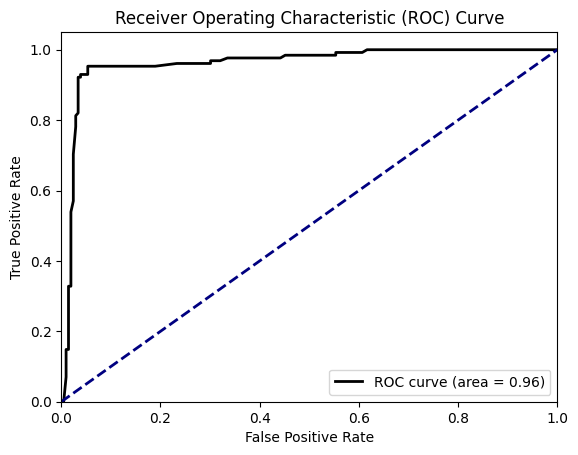

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score
from scipy import stats

# Compute precision
precision = precision_score(y_test,pred_y_Naive_bayes)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test,pred_y_Naive_bayes)
print("Recall:", recall)


# Make predictions on the test set
y_pred = NB_model.predict(x_test)
y_pred_proba_log = NB_model.predict_proba(x_test)[:, 1]
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log)
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# ROC Curve

In [82]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assuming that X_train, X_test, y_train, y_test are already defined

# Random forest model
Rm_scores = Rm_model.predict_proba(x_test)[:,1]

# SVM model
#clf_svm.predict(X_test)
svm_scores = clf_svm.predict_proba(x_test)[:,1]

# kNN_MODEL
kNN_scores = kNN_MODEL.predict_proba(x_test)[:,1]

#Cart Model
cart_scores = cart_model.predict_proba(x_test)[:,1]

#Naive Bayes ( Bernouili)
NB_scores = NB_model.predict_proba(x_test)[:,1]



# Generate ROC curve data for Random forest regression model
rm_fpr, rm_tpr, rm_thresholds = roc_curve(y_test, Rm_scores)
rm_auc = roc_auc_score(y_test, Rm_scores)

# Generate ROC curve data for SVM model
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_scores)
svm_auc = roc_auc_score(y_test, svm_scores)

# Generate ROC curve data for CART model
cart_fpr, cart_tpr, cart_thresholds = roc_curve(y_test, cart_scores)
cart_auc = roc_auc_score(y_test, cart_scores)

# Generate ROC curve data for Naive bayes model
NB_fpr, NB_tpr, NB_thresholds = roc_curve(y_test, NB_scores)
NB_auc = roc_auc_score(y_test, NB_scores)

# Generate ROC curve data for Knn model
Knn_fpr, Knn_tpr, Knn_thresholds = roc_curve(y_test, kNN_scores)
Knn_auc = roc_auc_score(y_test, kNN_scores)


# Generate a trace for the Random Forest ROC curve
trace0 = go.Scatter(
    x=rm_fpr,
    y=rm_tpr,
    mode='lines',
    name=f'Random Forest(Area = {rm_auc:.2f})'
)

#Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=svm_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'SVM (Area = {svm_auc:.2f})'

)


# Generate a trace for the KNN ROC curve
trace2 = go.Scatter(
    x=Knn_fpr,
    y=Knn_tpr,
    mode='lines',
    name=f'KNN (Area = {Knn_auc:.2f})'
)

# Generate a trace for the Cart ROC curve
trace3 = go.Scatter(
    x=cart_fpr,
    y=cart_tpr,
    mode='lines',
    name=f'CART (Area = {cart_auc:.2f})'
)

# Generate a trace for the Naive bayes  ROC curve
'''trace4 = go.Scatter(
    x=NB_fpr,
    y=NB_tpr,
    mode='lines',
    name=f'Naive Baiyes (Area = {NB_auc:.2f})'
)
'''

# Diagonal line
trace5 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0,trace1,trace2,trace3,trace5]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


'''
# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()'''

'\n# Plot ROC curve\nimport matplotlib.pyplot as plt\nplt.figure()\nplt.plot(fpr, tpr, color=\'darkorange\', lw=2, label=\'ROC curve (area = %0.2f)\' % roc_auc)\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=2, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver Operating Characteristic (ROC) Curve\')\nplt.legend(loc="lower right")\nplt.show()'

# Bayesian Statistical Model

# Dataset for this type of models Use df (with balanced the dataset)

In [ ]:
df_oversampled.info()

In [ ]:
df.columns.values

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel="linear", probability=True)
clf_svm = svm_model.fit(x_train_oversampled, y_train_oversampled)
pred_y_svm = clf_svm.predict(x_test)
from sklearn.metrics import accuracy_score
score_svm = accuracy_score(y_test['AMI'], pred_y_svm)
print('Accuracy Score: ', score_svm)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_y_svm))
print(pd.crosstab(y_test['AMI'], pred_y_svm))

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

glm_model = smf.glm(formula = "AMI ~ HTN + DM + SMK + DL + FH + Sex + NSTEMI + SA + UA + HOCABG + HOPCI + Age_Group + LDL1 + HDL1 + TG1 + EF1 + Indication1 + TC1 ",
                data = df_oversampled,
                family = sm.families.Binomial())

# Fit the model
result = glm_model.fit()

# Display and interpret results

print(result.summary())

In [ ]:
# Estimated default probabilities
predictions = result.predict()

In [ ]:
glm_y_pred=pd.DataFrame(predictions)
glm_y_pred=glm_y_pred.round()
glm_y_pred=glm_y_pred.astype('int')

In [ ]:
glm_y_pred.value_counts()

In [ ]:
print("Normal accuracy: ", accuracy_score(df_oversampled['AMI'], glm_y_pred))
print(classification_report(df_oversampled['AMI'], glm_y_pred))

In [ ]:
glm_y_pred=glm_y_pred.values.flatten()
pd.crosstab(df_oversampled['AMI'],glm_y_pred)

In [ ]:
#Cohen Kappa Score's
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(df_oversampled['AMI'],glm_y_pred)

# Bayesian GLM

In [ ]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)


# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

In [ ]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [ ]:
from sklearn.model_selection import train_test_split
x_Bayesian= df_oversampled.drop('AMI',axis=1)
y_Bayesian = df_oversampled['AMI']
X_train_Bayesian, X_test_Bayesian, y_train_Bayesian, y_test_Bayesian = train_test_split(X_Bayesian, y_Bayesian, test_size=0.3, random_state=0)

In [ ]:
# PyMC3 for Bayesian Inference
import pymc3 as pm

In [ ]:
# Formula for Bayesian Linear Regression (follows R formula syntax
formula = df['AMI'] ~ + ' + '.join(['%s' % variable for variable in X_train_Bayesian.columns[1:]])
formula

In [ ]:
pip install bambi

In [ ]:
import arviz as az
import bambi as bmb
import pandas as pd

# Initialize the fixed effects only model
model = bmb.Model("AMI ~ HTN + DM + SMK + DL + FH + Sex + NSTEMI + SA + UA + HOCABG + HOPCI + Age_Group + LDL1 + HDL1 + TG1 + EF1 + Indication1 + TC1 ",
                data = df_oversampled)

# Fit the model using 1000 on each of 4 chains
results = model.fit(draws=1000, chains=4)

# Use ArviZ to plot the results
az.plot_trace(results)

# Key summary and diagnostic info on the model parameters
az.summary(results)

In [ ]:
# Context for the model
with pm.Model() as normal_model:

    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()

    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train_Bayesian, family = family)

    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500, njobs=-1)

In [ ]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from pymc3 import HalfCauchy, Model, Normal, glm, plot_posterior_predictive_glm, sample

print(f"Running on PyMC3 v{pm.__version__}")

In [ ]:
from sklearn.model_selection import train_test_split
x_Bayesian= df_oversampled.drop('AMI',axis=1)
y_Bayesian = df_oversampled['AMI']
X_train_Bayesian, X_test_Bayesian, y_train_Bayesian, y_test_Bayesian = train_test_split(X_Bayesian, y_Bayesian, test_size=0.3, random_state=0)

In [ ]:
y_Bayesian=pd.DataFrame(y_Bayesian)

In [ ]:
with Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10, testval=1.0)
    intercept = Normal("Intercept", 0, sigma=20)
    x_coeff = Normal("x_Bayesian", 0, sigma=20)

    # Define likelihood  (1,980) (980,18)
    likelihood = Normal("y_Bayesian", mu=intercept + x_coeff * x_Bayesian, sigma=sigma, observed=y_Bayesian)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    trace = sample(3000, return_inferencedata=True)

In [ ]:
model = bmb.Model("AMI ~ HTN + DM + SMK + DL + FH + Sex + NSTEMI + SA + UA + HOCABG + HOPCI + Age_Group + LDL1 + HDL1 + TG1 + EF1 + Indication1 + TC1 ",
                data = df_oversampled)
trace = model.fit(draws=3000)

# Roc Curve

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assuming that X_train, X_test, y_train, y_test are already defined

# Random forest model
Rm_scores = result.predict_proba(X_test_MinMaxScaller)[:,1]

# Generate ROC curve data for Random forest regression model
rm_fpr, rm_tpr, rm_thresholds = roc_curve(y_test_MinMaxScaller, Rm_scores)
rm_auc = roc_auc_score(X_test_MinMaxScaller, Rm_scores)


# Generate a trace for the Naive bayes  ROC curve
trace4 = go.Scatter(
    x=NB_fpr,
    y=NB_tpr,
    mode='lines',
    name=f'Naive Baiyes (Area = {NB_auc:.2f})'
)


# Diagonal line
trace5 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()

In [ ]:
glm.fit <- glm(Severity_Binary ~ Side + State + Timezone + Temperature.F. + Wind_Chill.F. + Humidity... + Pressure.in. + Visibility.mi. + Wind_Direction + Wind_Speed.mph. + Precipitation.in. + Amenity + Bump + Crossing + Give_Way + Junction + No_Exit + Railway + Station + Stop + Traffic_Calming + Traffic_Signal + Sunrise_Sunset' , data = train_data, family = binomial)

glm.probs <- predict(glm.fit,type = "response")

glm.probs = predict(glm.fit, newdata = test_data, type = "response")
glm.pred = ifelse(glm.probs > 0.5, "1", "0")

https://www.pymc.io/projects/docs/en/v3.11.4/pymc-examples/examples/generalized_linear_models/GLM-linear.html